In [26]:
!pip3 install opendatasets

In [27]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats/data")


Skipping, found downloaded files in "./dogs-vs-cats" (use force=True to force download)


In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [29]:
#Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

validate_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)


)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [30]:
#Normalize

def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validate_ds = validate_ds.map(process)



In [31]:
#Create a CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))









In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(train_ds,epochs=10,validation_data=validate_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 81ms/step - accuracy: 0.5804 - loss: 0.6994 - val_accuracy: 0.7400 - val_loss: 0.5359
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7469 - loss: 0.5094 - val_accuracy: 0.7776 - val_loss: 0.4924
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.8072 - loss: 0.4143 - val_accuracy: 0.7936 - val_loss: 0.4913
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 67ms/step - accuracy: 0.8709 - loss: 0.2893 - val_accuracy: 0.7818 - val_loss: 0.6550
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9324 - loss: 0.1687 - val_accuracy: 0.7856 - val_loss: 0.7926
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9594 - loss: 0.1084 - val_accuracy: 0.7656 - val_loss: 1.1098
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9741 - loss: 0.0729 - val_accuracy: 0.7730 - val_loss: 1.1555
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.9813 - loss: 0.0550 - 

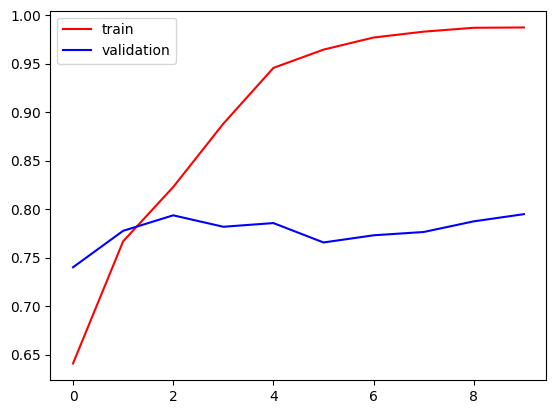

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


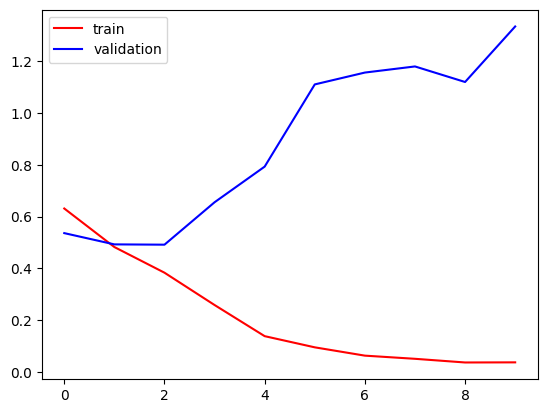

In [36]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


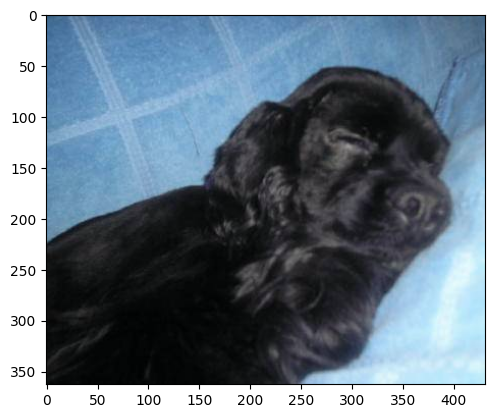

In [48]:
# Testing

import cv2
test_img = cv2.imread('/content/dogs-vs-cats/dogs_vs_cats/train/dogs/dog.10023.jpg')
plt.imshow(test_img)
plt.show()

In [49]:
test_img =cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

prediction = model.predict(test_input)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.]]


In [50]:
if prediction[0][0] > 0.5:
  print("Cat")
else:
  print("Dog")

Cat
